In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)

- copied from hands on DA with Pandas notebook

| Parameter | Purpose | Data Type |
| --- | --- | --- |
| `kind` | Determines the plot type | String (`line, bar, barh`) |
| `x`/`y` | Column(s) to plot on the *x*-axis/*y*-axis | String or list |
| `ax` | Draws the plot on the `Axes` object provided | `Axes` |
| `subplots` | Determines whether to make subplots | Boolean |
| `layout` | Specifies how to arrange the subplots | Tuple of `(rows, columns)` |
| `figsize` | Size to make the `Figure` object | Tuple of `(width, height)` | 
| `title` | The title of the plot or subplots | String for the plot title or a list of strings for subplot titles |
| `legend` | Determines whether to show the legend | Boolean |
| `label` | What to call an item in the legend | String if a single column is being plotted; otherwise, a list of strings |
| `style` | `matplotlib` style strings for each item being plotted | String if a single column is being plotted; otherwise, a list of strings |
| `color` | The color to plot the item in | String or red, green, blue tuple if a single column is being plotted; otherwise, a list |
| `colormap` | The colormap to use | String or `matplotlib` colormap object |
| `logx`/`logy`/`loglog` | Determines whether to use a logarithmic scale for the *x*-axis, *y*-axis, or both | Boolean |
| `xticks`/`yticks` | Determines where to draw the ticks on the *x*-axis/*y*-axis | List of values |
| `xlim`/`ylim` | The axis limits for the *x*-axis/*y*-axis | Tuple of the form `(min, max)` |
| `rot` | The angle to write the tick labels at | Integer |
| `sharex`/`sharey` | Determines whether to have subplots share the *x*-axis/*y*-axis | Boolean |
| `fontsize` | Controls the size of the tick labels | Integer |
| `grid` | Turns on/off the grid lines | Boolean |


In [3]:
# load data into dataframes
fb = pd.read_csv('../datasets/fb.csv', index_col='date', parse_dates=True)
eq = pd.read_csv('../datasets/earthquakes.csv')
covid = pd.read_csv('../datasets/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [4]:
fb.head(2)

,high,low,open,close,volume
date,,,,,
2018-01-02,181.58,177.55,177.68,181.42,18151900
2018-01-03,184.78,181.33,181.88,184.67,16886600


In [5]:
eq.head(2)

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01,NaN,85.00,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.00,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.02,NaN,79.00,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.00,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...


In [6]:
covid.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-01-18,18/01/2020,18,1,2020,0,0,Croatia,HR,HRV,4076246.00,Europe,0.00
2020-01-18,18/01/2020,18,1,2020,0,0,Greece,EL,GRC,10724599.00,Europe,0.00


In [9]:
covid.drop(columns='dateRep', inplace=True)

<Axes: title={'center': 'FB open prices'}, xlabel='date'>

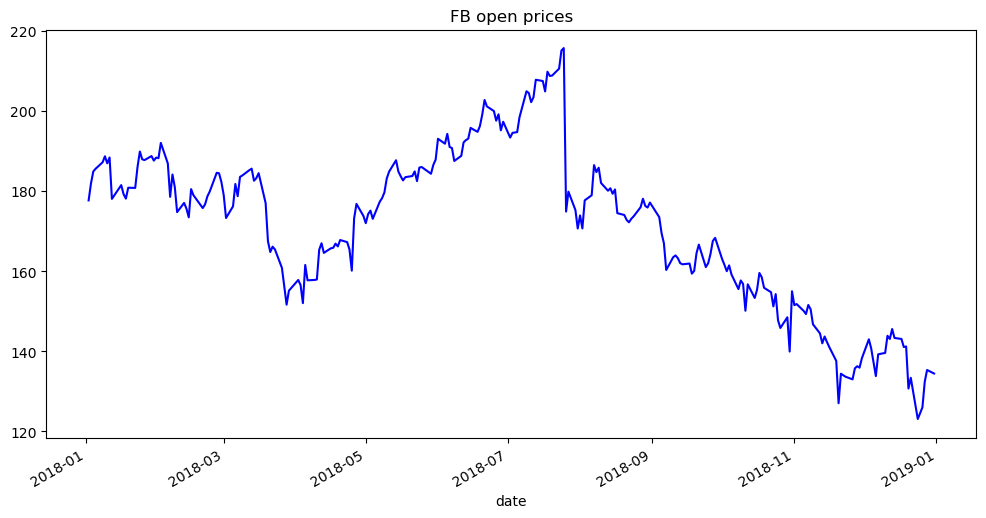

In [14]:
fb.plot(
    kind = 'line',
    y = 'open',
    figsize = (12, 6),
    legend = False,
    title='FB open prices',
    #color = 'green', # either color or style
    style='b-' # 2 arguments with matplotlib: color and linestyle
)

<Axes: title={'center': 'OHLC'}, xlabel='date'>

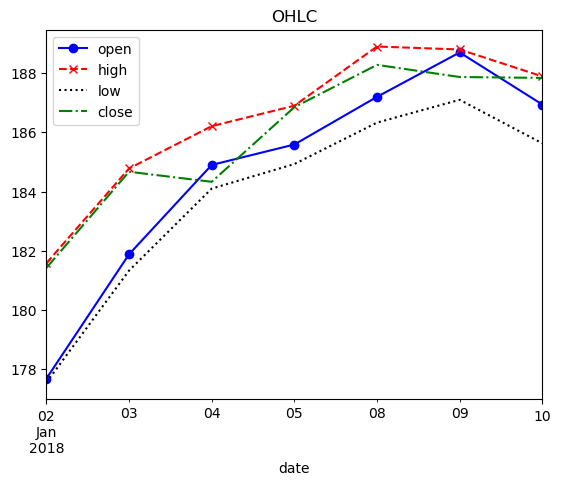

In [18]:
# pass the list of columns to timeseries plot
fb.iloc[:7].plot(
    # kind = 'line', <- default, no need to mention
    y=['open', 'high', 'low', 'close'],
    style=['b-o', 'rx--', 'k:', 'g-.'],
    title = 'OHLC'
)

Pandas can plot all columns in the same cell as above or as a subplot as below.

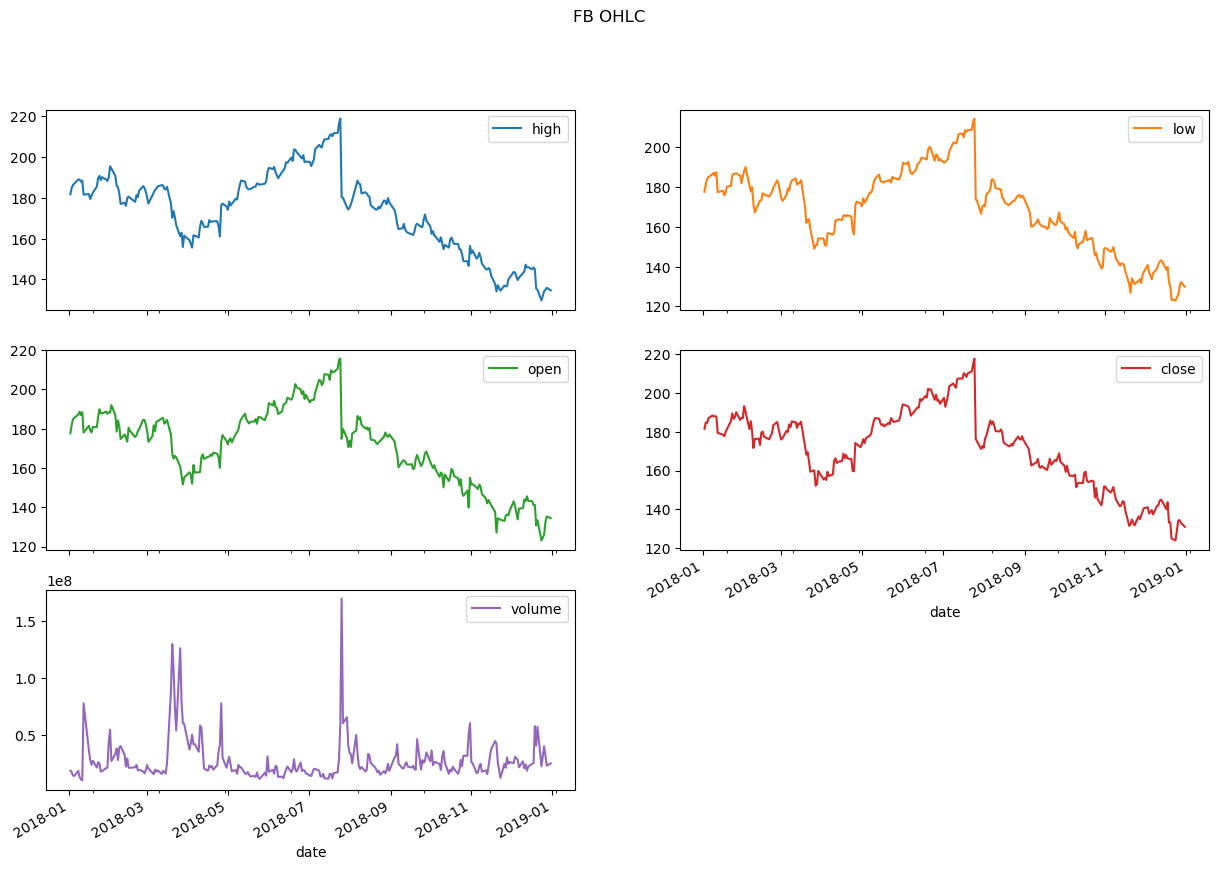

In [20]:
fb.plot(
    subplots=True,
    layout=(3, 2), # (rows, columns)
    figsize = (15, 10),
    title='FB OHLC'
)
plt.show()

More subplots